<div align="center">

# Análise da Pokédex
</div>

![Pokémon](bannerpkm.jpg)
   
---

Este projeto consiste em uma análise exploratória completa da Pokédex, utilizando dados de todas as gerações de Pokémon. O objetivo é treinar e aplicar habilidades de análise de dados, limpeza de dados, agrupamentos, filtragem, métricas estatísticas e visualização de informações. Além disso, o projeto explora insights interessantes para fãs de Pokémon como por exemplo: tipos predominantes por geração, distribuição de status base, Pokémon lendários e comparações de força entre gerações.

Embora seja um projeto motivado pelo interesse pessoal, ele demonstra competências práticas em análise de dados que podem ser aplicadas em problemas do mundo real, como descobrir padrões em grandes datasets, interpretar métricas e tomar decisões baseadas em dados.

## 1 - Extraindo dados do arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

arquivo = pd.read_csv("Pokedex.csv", encoding='latin1')
display(arquivo)

,#,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Variant
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,NaN
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,NaN
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,NaN
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1004,Chi-Yu,Dark,Fire,570,55,80,80,135,120,100.0,NaN
1169,1005,Roaring Moon,Dragon,Dark,590,105,139,71,55,101,119.0,NaN
1170,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116.0,NaN
1171,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135.0,NaN


## 2 - Entendendo os dados

In [2]:
print(arquivo.head())
print(arquivo.info())

   #        Name Primary Type Secondary Type  Total  HP  Attack  Defense  \
0  1   Bulbasaur        Grass         Poison    318  45      49       49   
1  2     Ivysaur        Grass         Poison    405  60      62       63   
2  3    Venusaur        Grass         Poison    525  80      82       83   
3  3    Venusaur        Grass         Poison    625  80     100      123   
4  4  Charmander         Fire            NaN    309  39      52       43   

   Sp.Atk  Sp.Def  Speed Variant  
0      65      65   45.0     NaN  
1      80      80   60.0     NaN  
2     100     100   80.0     NaN  
3     122     120   80.0     NaN  
4      60      50   65.0     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #               1173 non-null   int64  
 1   Name            1173 non-null   object 
 2   Primary Type    1172 non-null   object 
 

Nesta seção, os dados da Pokédex são carregados e inspecionados para entender o conteúdo das colunas, tipos de dados e possíveis valores ausentes ou inconsistentes.

## 3 - Adicionando uma coluna que verifica se o Pokémon em questão é um lendário ou não

In [3]:
# Lista de Pokémons lendários por geração
legendary_pokemon = {
    1: ['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew'],
    2: ['Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Celebi'],
    3: ['Regirock', 'Registeel', 'Regice', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys'],
    4: ['Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Giratina', 'Heatran', 'Regigigas', 'Cresselia', 'Darkrai', 'Shaymin', 'Arceus'],
    5: ['Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 'Reshiram', 'Zekrom', 'Landorus', 'Kyurem', 'Keldeo', 'Meloetta', 'Genesect'],
    6: ['Xerneas', 'Yveltal', 'Zygarde', 'Diancie', 'Hoopa', 'Volcanion'],
    7: ['Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Necrozma', 'Magearna', 'Marshadow'],
    8: ['Zarude', 'Regieleki', 'Regidrago', 'Calyrex', 'Glastrier', 'Spectrier', 'Eternatus'],
    9: ['Koraidon', 'Miraidon', 'Terapagos']
}

arquivo['Legendary'] = arquivo['Name'].apply(lambda x:any(x == name for names in legendary_pokemon.values() for name in names))
arquivo

,#,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Variant,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,NaN,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,NaN,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,NaN,False
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,NaN,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1004,Chi-Yu,Dark,Fire,570,55,80,80,135,120,100.0,NaN,False
1169,1005,Roaring Moon,Dragon,Dark,590,105,139,71,55,101,119.0,NaN,False
1170,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116.0,NaN,False
1171,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135.0,NaN,True


Aqui foi utilizado um dicionário de dados para atribuir uma coluna do tipo booleano a qual indicasse se o pokémon em questão faz ou não parte do raro grupo dos lendários, coluna esta que será usada em análises posteriores.

## 4 - Verificando a Porcentagem de pokémon de cada tipo

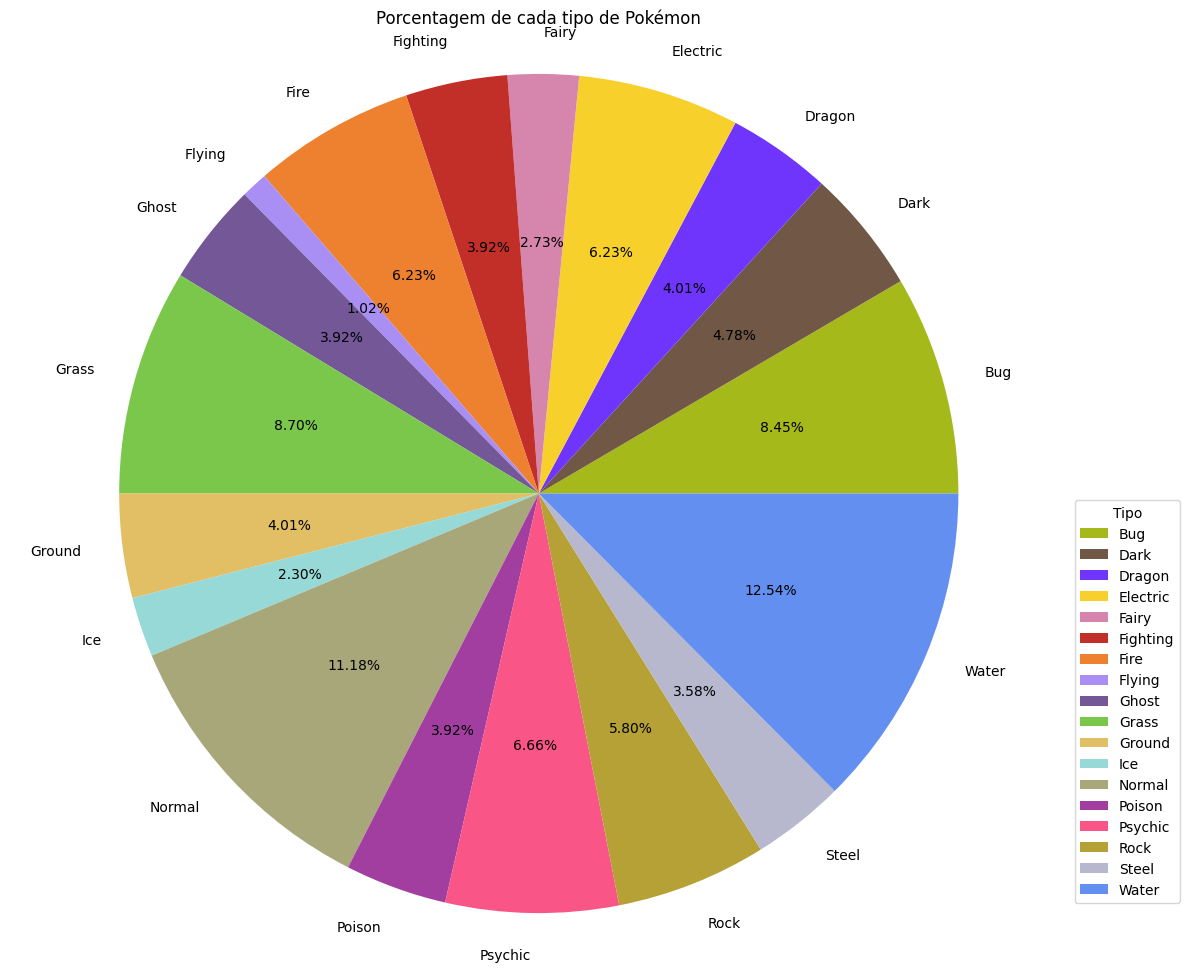

In [4]:
qtd_tipos = arquivo.groupby('Primary Type').size()
# display(qtd_tipos)

tipo = qtd_tipos.index
porcent = qtd_tipos.values 

# Dicionário de cores por tipo de Pokémon
pokemon_colors = {
    "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}

cores = [pokemon_colors[type] for type in tipo]

plt.figure(figsize=(12,10))
plt.title("Porcentagem de cada tipo de Pokémon")
# plt.figtext(0.2, 0.85, )
plt.pie(porcent, labels=tipo, colors=cores, autopct='%1.2f%%')
plt.axis('equal')
plt.legend([f'{type}' for type in tipo], 
           title="Tipo", loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("graficos/1-Grafico_porcent_tipo_pkm.png", bbox_inches='tight')
plt.show()

O gráfico de pizza mostra uma vantagem significativa na existência de Pokémon do tipo **Água(12,54%)** e do tipo 
**Normal(11,18%)** em relação ao total, uma causa disso pode se dar ao fato dos 2 tipos serem equilibrados em relação
a outros, visto que o tipo *Água* possui poucas fraquezas(apenas *Elétrico* e *Planta*) e do tipo *Normal* ser um tipo neutro 
que não possui muitas vantagens e desvantagens, além de serem mais numerosos nas rotas iniciais, o que 
torna este tipo muito amigável para que jogadores iniciantes se acostumem com a mecânica do jogo, enquanto 
tipos mais raros como *Dragão* tornam-se alvos de desejo aumentando a emoção ao encontrar, capturar e treinar um
deles.

Por outro lado, tipos como **Gelo(2,30%)** e **Fada(2,73%)** são escassos intencionalmente com a mesma finalidade de 
manter o equilibrio, o caso do tipo *Fada* em particular se diferencia do tipo *Gelo*, pois ele foi introduzido 
tardiamente nos jogos para ser mais um counter do tipo *Dragão*, que, por conta de seu baixo número de 
fraquezas e seus altos stats por muito tempo dominou o game, contudo, os 2 tipos se mantiveram escassos para que o tipo
*Dragão* não perdesse seu impacto na aventura.

O tipo **Voador(1,02%)** tem baixa participação não por ser raro, mas por geralmente aparecer como tipagem secundária, o que o faz 
ocupar uma posição menor neste estudo baseado apenas nos tipos primários.

---

## 5 - Analisando quantos Pokémon possuem um tipo secundário

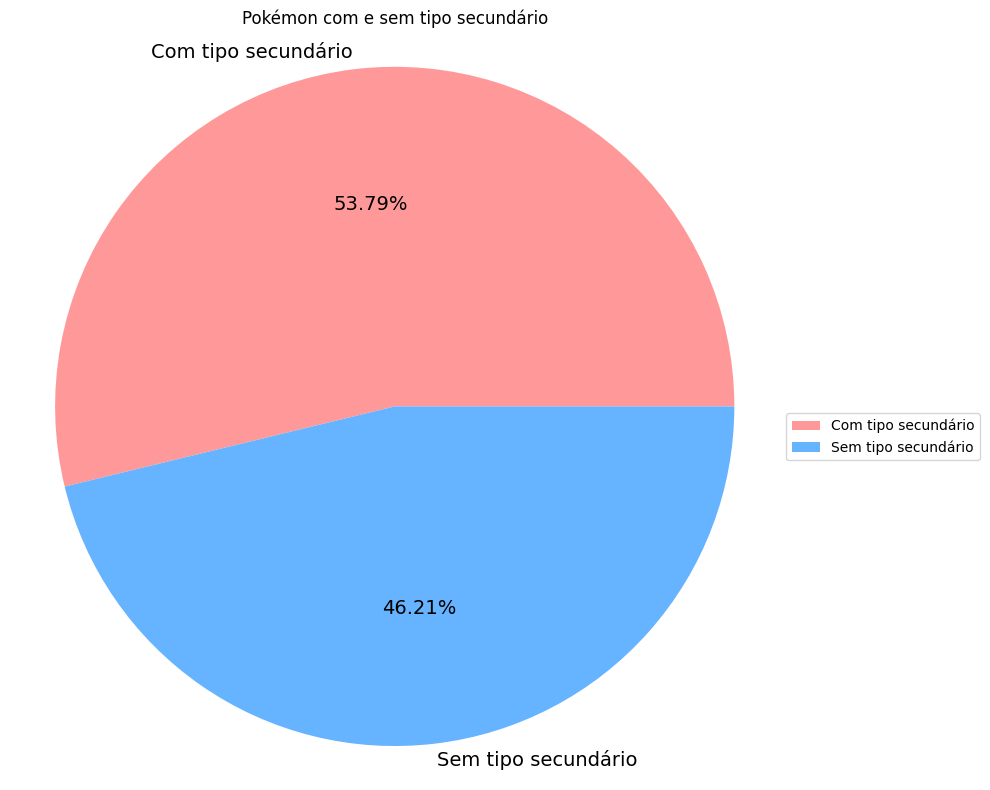

In [5]:
tem_sec = arquivo['Secondary Type'].notna() & (arquivo['Secondary Type'] != '')
total_tip_sec = tem_sec.sum()

plt.figure(figsize=(10,8))
plt.title("Pokémon com e sem tipo secundário")
plt.pie([total_tip_sec, len(arquivo) - total_tip_sec], autopct='%1.2f%%', labels=['Com tipo secundário', 'Sem tipo secundário'], 
        colors=['#ff9999','#66b3ff'], labeldistance=1.05, textprops={'fontsize': 14})
plt.axis('equal')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("graficos/2-Grafico_pkm_tipo_sec.png", bbox_inches='tight')
plt.show()






O gráfico de pizza compara a proporção de Pokémon com e sem tipo secundário. Observa-se que **53,79% possuem um tipo secundário**, enquanto **46,21% têm apenas o tipo primário**.

Essa tendência indica que os designers priorizam combinações de tipos para aumentar a diversidade estratégica, tornando batalhas mais complexas e interessantes.

Ao mesmo tempo,a presença significativa de Pokémon de tipo único garante uma base simples e equilibrada, útil para jogadores iniciantes formarem suas estratégias sem a necessidade de estudar a fundo o game e garantir sua diversão mesmo com pouco conhecimento.

Essa distribuição evidencia o cuidado no design do jogo e na experiência do jogador, equilibrando diversidade, aprendizado e complexidade.

---

## 6 - Comparando a quantidade de lendários distribuída por geração

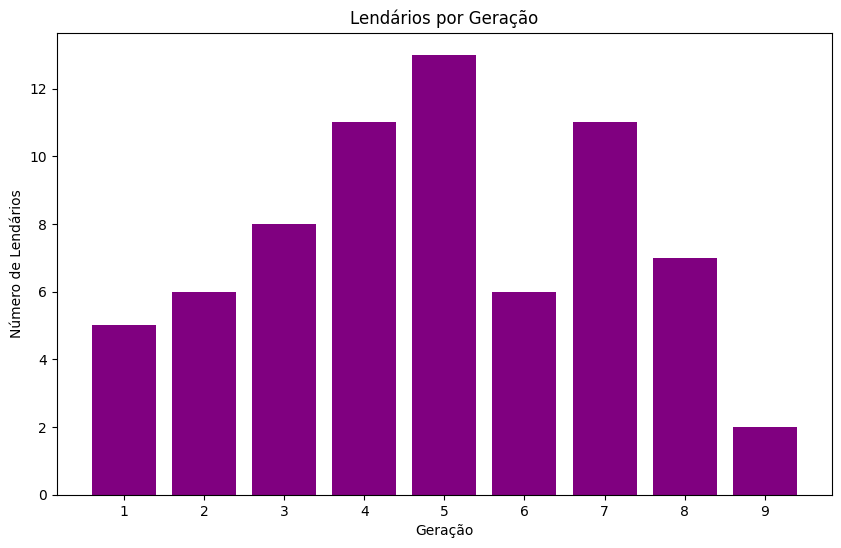

In [6]:
def get_generation(num):
    if 1 <= num <= 151:
        return 1
    elif 152 <= num <= 251:
        return 2
    elif 252 <= num <= 386:
        return 3
    elif 387 <= num <= 493:
        return 4
    elif 494 <= num <= 649:
        return 5
    elif 650 <= num <= 721:
        return 6
    elif 722 <= num <= 809:
        return 7
    elif 810 <= num <= 905:
        return 8
    elif 906 <= num <= 1025:
        return 9
    else:
        return None
    


arquivo['Legendary'] = arquivo['Legendary'].astype(bool)

arquivo["Generation"] = arquivo["#"].apply(get_generation)

lend = arquivo[arquivo["Legendary"] == True]


lend_por_gen = lend.groupby('Generation')['#'].nunique()
#display(lend_por_gen)

plt.figure(figsize=(10,6))
plt.bar(lend_por_gen.index, lend_por_gen.values, color='purple')
plt.xticks(lend_por_gen.index)
plt.xlabel("Geração")
plt.ylabel("Número de Lendários")
plt.title("Lendários por Geração")
plt.savefig("graficos/3-Grafico_lend_gen.png", bbox_inches='tight')
plt.show()


O gráfico de barras mostra a quantidade de Pokémon lendários de cada geração.

Nota-se um crescimento constante da **1ª geração(5)** até a **5ª geração(13)**, sugerindo uma estratégia de aumentar a diversidade e o apelo desses Pokémon ao longo dos anos.

A partir da **6ª geração**, entretanto, observa-se uma oscilação, com reduções e novos picos, indicando mudanças na filosofia de design e narrativa.

A **9ª geração** se destaca por apresentar apenas 2 lendários, possivelmente para reforçar a exclusividade desse grupo ou para priorizar novas mecânicas de jogo.

Essa análise revela que a distribuição de lendários não segue uma progressão linear, mas sim reflete escolhas criativas e estratégicas de cada fase da franquia.

---

## 7 - Verificando os tipos com maior média de stats base

In [7]:
stats_por_tipo = arquivo.groupby("Primary Type")[['HP','Attack','Defense','Sp.Atk','Sp.Def','Speed','Total' ]].mean()
display(stats_por_tipo)

,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Total
Primary Type,,,,,,,
Bug,56.252525,69.010101,70.656566,55.747475,65.101010,59.898990,376.666667
Dark,73.964286,87.267857,72.500000,72.446429,71.357143,76.821429,454.357143
Dragon,85.276596,106.106383,81.702128,88.851064,83.085106,84.765957,529.787234
Electric,62.452055,72.534247,65.109589,87.054795,69.698630,88.301370,445.150685
Fairy,72.156250,70.937500,73.687500,78.218750,87.593750,68.375000,450.968750
Fighting,75.695652,104.086957,74.934783,57.130435,69.413043,73.608696,454.869565
Fire,69.356164,84.041096,68.315068,87.178082,71.123288,73.698630,453.712329
Flying,70.333333,79.916667,68.250000,73.833333,73.250000,85.666667,451.250000
Ghost,64.543478,74.000000,79.195652,82.630435,79.717391,65.108696,445.195652


### 1 - Hp

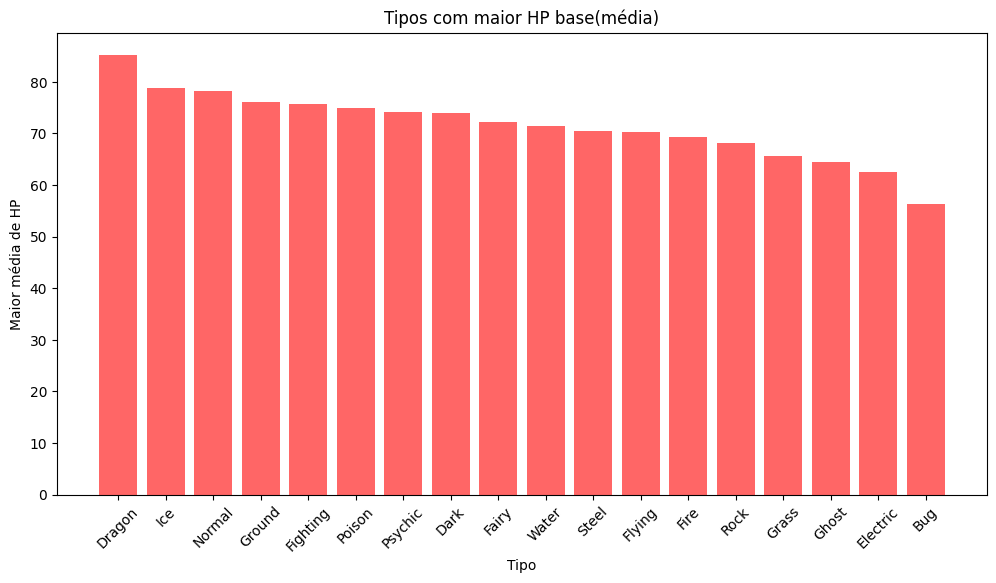

In [8]:
hp_por_tipo = stats_por_tipo['HP'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(hp_por_tipo.index, hp_por_tipo.values, color='#FF6666')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de HP")
plt.title("Tipos com maior HP base(média)")
plt.savefig("graficos/4-1-Grafico_hp_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de HP dos Pokémon ordenadas por tipo.

Observa-se que os tipos **Dragão**, **Gelo** e **Normal** possuem os maiores valores médios, indicando maior resistência e durabilidade em combate.

Em constraste, **Elétrico**, **Inseto** e **Fantasma** apresentam menor HP médio, sugerindo que esses tipos compensam com habilidades ofensivas ou velocidade.

Essa distribuição evidencia uma estratégia de balanceamento do jogo, na qual tipos duráveis oferecem resistência, enquanto tipos especializados oferecem outras vantagens, permitindo aos jogadores montar equipes diversificadas e estratégicas.

---

### 2 - Attack 

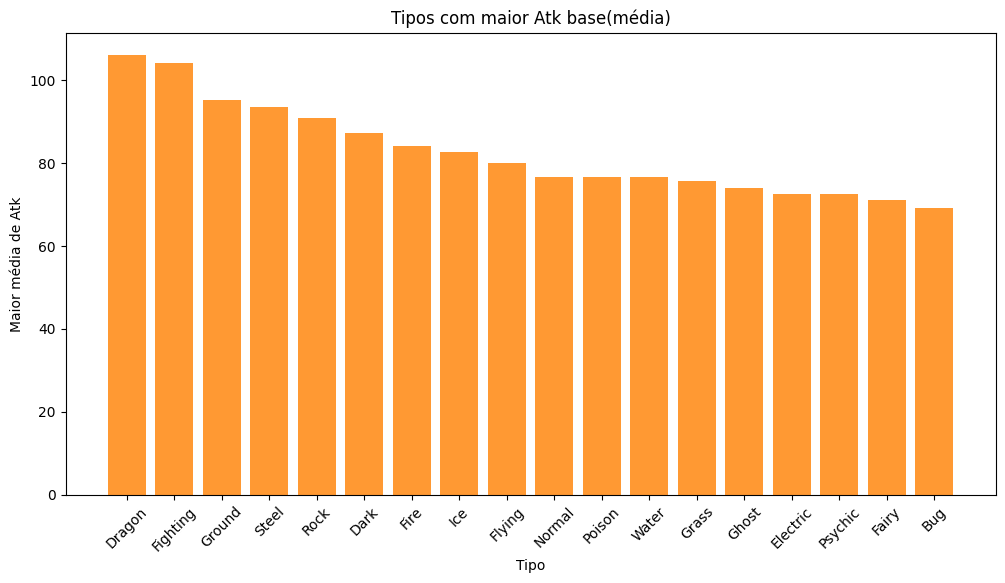

In [9]:
atk_por_tipo = stats_por_tipo['Attack'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(atk_por_tipo.index, atk_por_tipo.values, color='#FF9933')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de Atk")
plt.title("Tipos com maior Atk base(média)")
plt.savefig("graficos/4-2-Grafico_atk_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de Attack base dos Pokémon por tipo.

Observa-se que os tipos **Dragão**, **Lutador**, **Terrestre** e **Aço** possuem os maiores valores médios, indicando uma maior capacidade ofensiva, com Pokémon desse tipo sendo capazes de causar mais danos físicos em combate.

Em contraste, os tipos **Elétrico**, **Fada**, **Inseto** e **Psíquico** apresentam os menores valores de attack médio, sugerindo que esses tipos podem priorizar estratégias baseadas em habilidades especiais ou resistência, ao invés de dano massivo direto.

Essa distribuição revela uma abordagem de balanceamento no design do jogo, onde tipos com ataques físicos fortes, como *Dragão* e *Lutador*, são mais eficazes em ataques rápidos e poderosos, enquanto tipos com ataques mais fracos, como *Elétrico* e *Fada*, podem se destacar em aspectos como controle de campo, velocidade, ataques especiais ou efeitos de status.

---


### 3 - Defense

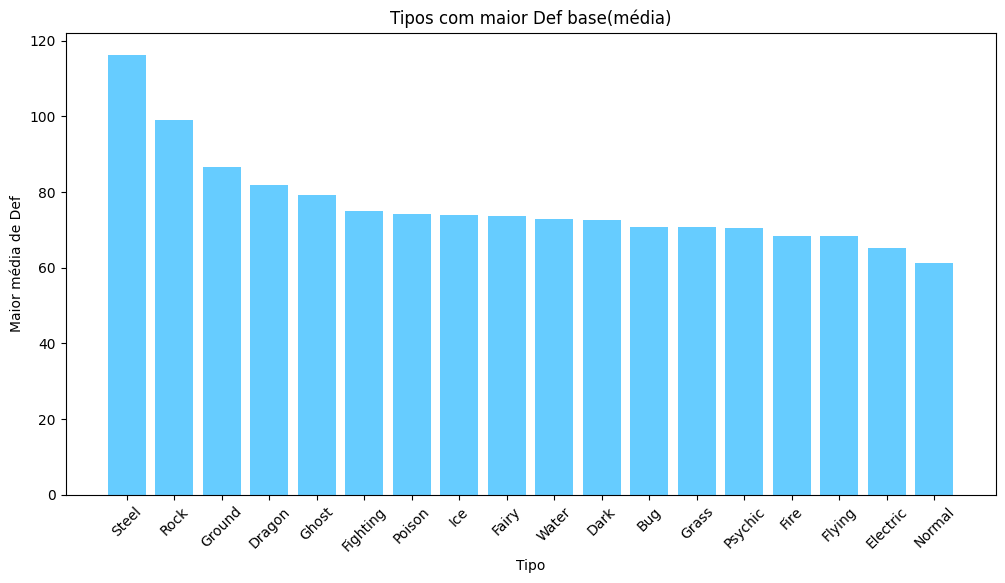

In [10]:
def_por_tipo = stats_por_tipo['Defense'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(def_por_tipo.index, def_por_tipo.values, color='#66CCFF')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de Def")
plt.title("Tipos com maior Def base(média)")
plt.savefig("graficos/4-3-Grafico_def_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de Defense base dos Pokémon por tipo.

Observa-se que os tipos **Aço**, **Pedra** e **Terrestre** possuem os maiores valores médios, indicando uma grande resistência e durabilidade em combate, esses tipos, com Defense acima de 100, são muito eficazes em absorver danos físicos, tornando-se ótimos para proteger a equipe.

Em constraste, os tipos **Normal**, **Elétrico** e **Voador** apresentam as menores médias de Def, sugerindo uma maior vulnerabilidade a ataques diretos. Pokémon desses tipos podem compensar com alta velocidade ou habilidades especiais, priorizando ofensividade ou evasão em vez de resistência física.

Essa distribuição demonstra uma estratégia de balanceamento do jogo, na qual tipos com alta Def se concentram em absorver muito os Ataques físicos e em fazer uma linha de frente para proteger o resto do time, enquanto os tipos com menor Def se concentram geralmente em oferecem um dano explosivo ou outras habilidades táticas contra outros treinadores.

---

### 4 - Special Attack

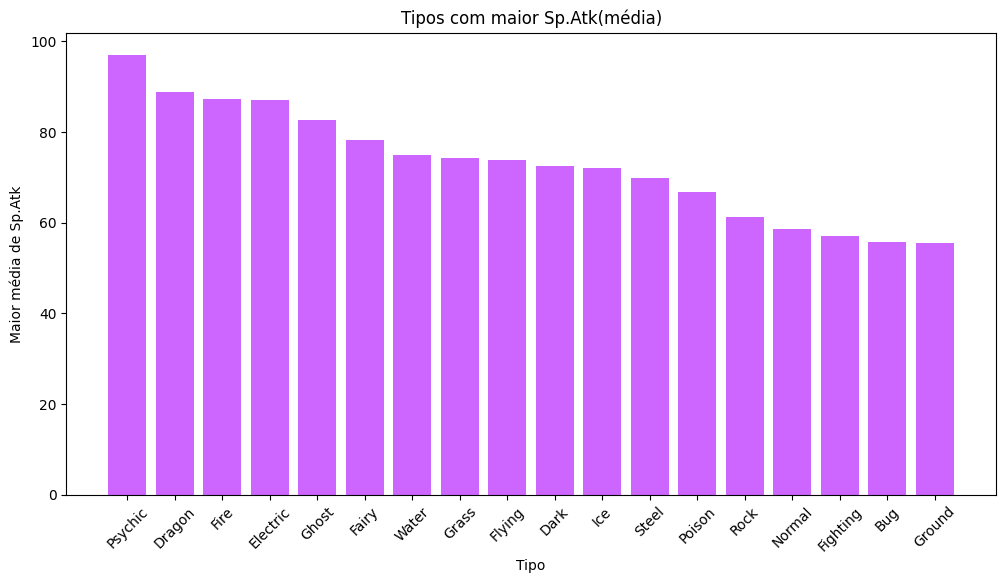

In [11]:
spatk_por_tipo = stats_por_tipo['Sp.Atk'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(spatk_por_tipo.index, spatk_por_tipo.values, color='#CC66FF')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de Sp.Atk")
plt.title("Tipos com maior Sp.Atk(média)")
plt.savefig("graficos/4-4-Grafico_spatk_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de Special Attack(Sp.Atk) base dos Pokémon por tipo.

Observa-se que os tipos **Psíquico**, **Dragão** e **Fogo** possuem as maiores médias , indicando uma grande capacidade ofensiva por meio de ataques especiais. Pokémon desses tipos são particularmente poderosos em causar dano à distância, frequentemente com habilidades que envolvem manipulação de elementos ou poderes psíquicos.

Em contraste, os tipos **Normal**, **Lutador** e **Terrestre** apresentam as menores médias de Sp.Atk, sugerindo que esses tipos são mais focados em ataques físicos ou habilidades de resistência. Pokémon desses tipos podem compensar sua baixa capacidade de ataque especial com uma abordagem mais direta e física durante as batalhas.

Essa distribuição evidencia como o balanceamento do jogo permite que tipos com alta Sp.Atk sejam usados para estratégias baseadas em ataques à distância e controle de campo, enquanto tipos com baixa Sp.Atk geralmente se concentram em resistência e combate direto.

---

### 5 - Special Defense

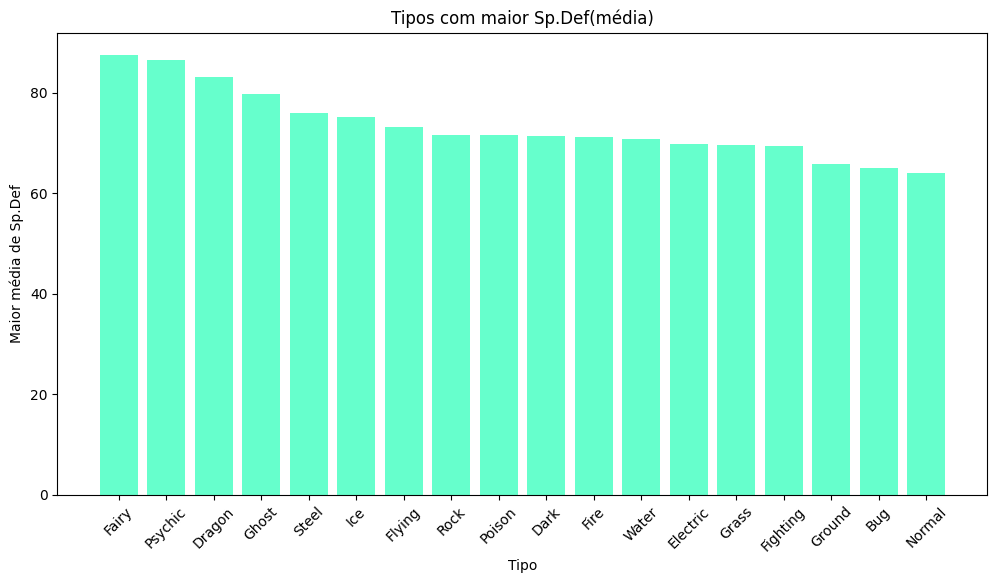

In [12]:
spdef_por_tipo = stats_por_tipo['Sp.Def'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(spdef_por_tipo.index, spdef_por_tipo.values, color='#66FFCC')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de Sp.Def")
plt.title("Tipos com maior Sp.Def(média)")
plt.savefig("graficos/4-5-Grafico_spdef_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de Sp.Def(Special Defense) dos Pokémon por tipo.

Observa-se que os tipos **Fada**, **Psíquico** e **Dragão** possuem as maiores médias, indicando maior resistência contra ataques especiais e maior probabilidade de funcionarem como "Paredes" ou suporte em batalhas que envolvem dano especial.

Em constraste, **Ground**, **Bug** e **Normal** apresentam as menores médias de Sp.Def, sugerindo que esses tipos tendem a privilegiar outros atributos(como atk físico ou velocidade)em vez de defesa especial.

Essa distribuição evidencia uma escolha de design em que alguns tipos são orientados para mitigar dano especial e sustentar a equipe, enquanto outros são projetados para papéis mais ofensivos ou especializados.

---

### 6 - Speed

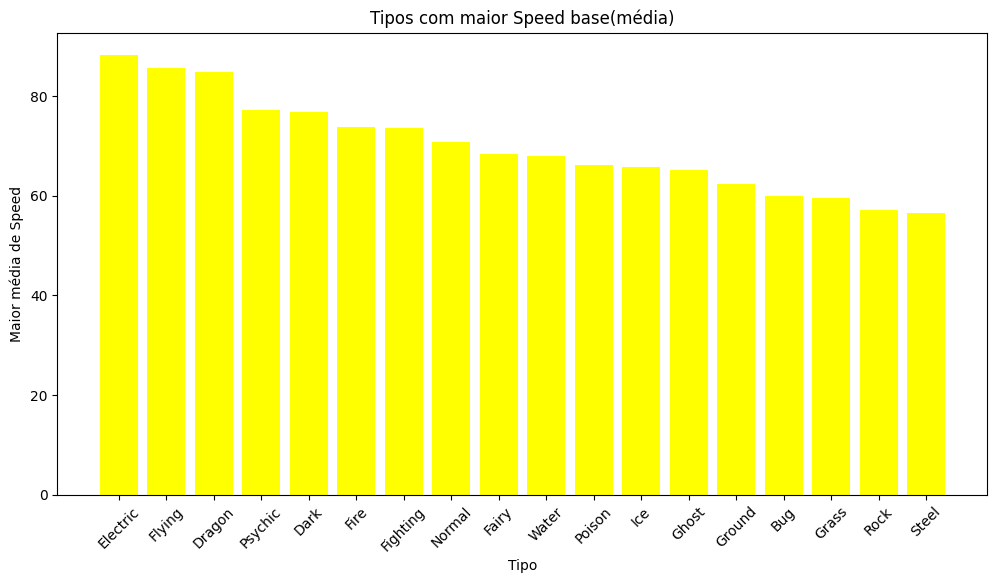

In [13]:
speed_por_tipo = stats_por_tipo['Speed'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(speed_por_tipo.index, speed_por_tipo.values, color="#FFFF00")
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média de Speed")
plt.title("Tipos com maior Speed base(média)")
plt.savefig("graficos/4-6-Grafico_speed_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média de Speed(Velocidade) dos Pokémon por tipo.

Observa-se que os tipos **Elétrico**, **Voador** e **Dragão** possuem os maiores valores médios, indicando maior agilidade e capacidade de atacar antes do oponente, reforçando seu papel em batalhas rápidas e dinâmicas.

Em contraste, os tipos **Grama**, **Pedra** e **Aço** apresentam os menores valores médios de Speed, sugerindo um foco em resistência ou poder defensivo em vez de mobilidade.

Essa distribuição evidencia uma estratégia de balanceamento do jogo, na qual alguns tipos são projetados para garantir a iniciativa nos combates, enquanto outros são construídos para absorver dano e criar estratégias de longo prazo.

---

### 7 - Total

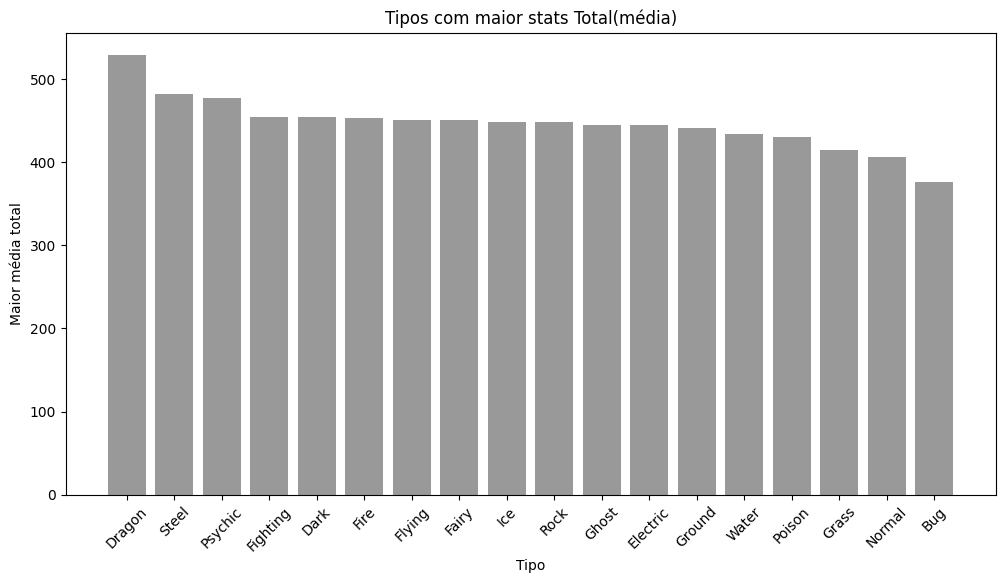

In [14]:
total_por_tipo = stats_por_tipo['Total'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(total_por_tipo.index, total_por_tipo.values, color='#999999')
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Maior média total")
plt.title("Tipos com maior stats Total(média)")
plt.savefig("graficos/4-7-Grafico_total_tipo.png", bbox_inches='tight')
plt.show()

O gráfico de barras apresenta a média do Total de stats dos Pokémon por tipo.

Observa-se que os tipos **Dragão**, **Aço** e **Psíquico** possuem as maiores médias, indicando que esses Pokémon tendem a ser mais completos e versáteis em combate, frequentemente desempenhando papéis centrais nas equipes. 

Em contraste, os tipos **Normal**, **Inseto** e **Grama** apresentam os menores valores médios, sugerindo que seus representantes ocupam papéis mais básicos ou especializados, sem a mesma abrangência de atributos.

Essa distribuição evidencia uma estratégia de balanceamento na franquia, em que certos tipos funcionam como símbolos de poder e raridade, enquanto outros representam acessibilidade e diversidade no início da jornada.

---

## 8 - Definindo qual a geração mais forte(Baseada nos stats totais)

Generation
8    457.625000
7    451.980198
4    450.100000
9    447.918182
6    442.918605
5    435.057471
3    431.931677
1    428.408163
2    417.495495
Name: Total, dtype: float64

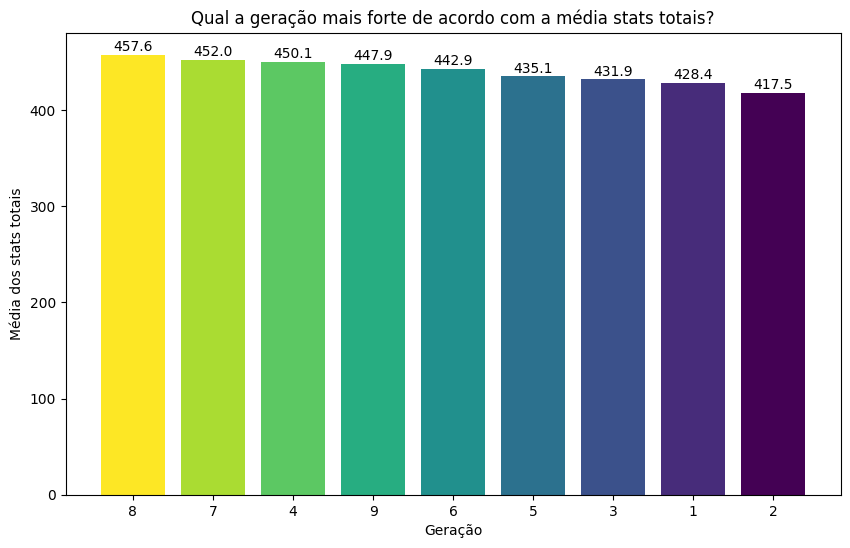

In [15]:
media_total_por_gen = (
    arquivo.groupby('Generation')['Total']
    .mean()
    .sort_values(ascending=False)
)
display(media_total_por_gen)

import matplotlib.cm as cm
colors = cm.viridis_r(np.linspace(0, 1, len(media_total_por_gen)))

plt.figure(figsize=(10,6))
bars = plt.bar(range(len(media_total_por_gen)), media_total_por_gen.values, color=colors)

# coloca os números das gerações no eixo X na ordem decrescente
plt.xticks(range(len(media_total_por_gen)), media_total_por_gen.index)

plt.xlabel("Geração")
plt.ylabel("Média dos stats totais")
plt.title("Qual a geração mais forte de acordo com a média stats totais?")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval,1),
             ha='center', va='bottom', fontsize=10, color='black')
plt.savefig("graficos/5-Grafico_gen_mais_forte.png", bbox_inches='tight')
plt.show()


O gráfico apresenta a média total de stats por geração de Pokémon. 

A análise revela que a **8ª geração** lidera com a maior média(457,6), seguida pela **7ª** e **4ª gerações**, indicando um aumento gradual na força média dos Pokémon ao longo do tempo.

Por outro lado, as **gerações 2, 1** e **3** possuem as menores médias, o que reflete o design mais simples e menos voltado para balanceamento competitivo das primeiras eras da franquia.

Essa diferença mostra como os criadores foram aumentando a complexidade e o poder dos Pokémon com o passar das gerações, acompanhando a evolução do competitivo e a expectativa dos fãs.

No entanto, é importante destacar que Pokémon icônicos das gerações iniciais permanecem relevantes por design, carisma e por receberem evoluções ou formas alternativas em jogos posteriores.

---

## 9 - Descobrindo o tipo com mais Pokémon de cada geração 

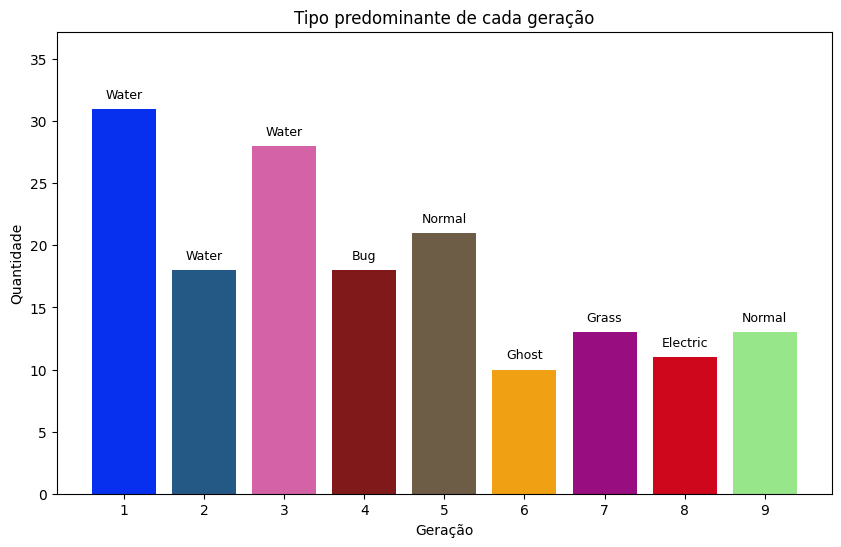

In [16]:
# função de cores
def cores_aleatorias(n):
    return ["#" + ''.join(np.random.choice(list('0123456789ABCDEF'), 6)) for _ in range(n)]

# calcula tipo + quantidade de forma segura
tipos_gen = arquivo.groupby('Generation')['Primary Type'].agg(
    Tipo=lambda x: x.value_counts().idxmax(),
    Quantidade=lambda x: x.value_counts().max()
).reset_index()

# garante que quantidade é numérica
tipos_gen['Quantidade'] = pd.to_numeric(tipos_gen['Quantidade'])

# plot
plt.figure(figsize=(10,6))
colors_list = cores_aleatorias(len(tipos_gen))  # gera lista de cores
bars = plt.bar(tipos_gen['Generation'].astype(str), tipos_gen['Quantidade'], color=colors_list)

# anota o 'Tipo' acima de cada barra
max_q = tipos_gen['Quantidade'].max()
for bar, tipo in zip(bars, tipos_gen['Tipo']):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + max_q*0.02, tipo, ha='center', va='bottom', fontsize=9)

plt.xlabel('Geração')
plt.ylabel('Quantidade')
plt.title('Tipo predominante de cada geração')
plt.ylim(0, max_q * 1.2)
plt.savefig("graficos/6-Grafico_tipo_pred_gen.png", bbox_inches='tight')
plt.show()



O gráfico apresenta o tipo predominante em cada geração de Pokémon, revelando como o design dos monstrinhos está intimamente ligado ao **ambiente e à inspiração cultural de cada região**.

Nas 3 primeiras gerações, o tipo **Água** foi dominante, refletindo a forte presença de mares e lagos em Kanto, Johto e, especialmente em Hoenn. 

Em seguida, observa-se uma mudança: tipos como **Inseto(Gen 4)** e **Fantasma(Gen 6)** se destacam em regiões com florestas densas e castelos sombrios, enquanto **Grama(Gen 7)** surge em Alola, coerente com a ambientação tropical.

O tipo **Normal(Gens 5 e 9)** aparece com força em Unova e Paldea, regiões inspiradas em locais urbanos ou de grande diversidade cultural, representando o "cotidiano" e a versatilidade. Já o tipo **Elétrico(Gen 8)** traduz aspecto tecnológico e moderno de Galar.

Esses padrões mostram que o tipo predominante não é aleatório: ele reflete tanto o **ambiente natural** quanto a **identidade cultural** da região em que os jogos foram baseados, tornando cada geração única em termos de temática e ecossistema Pokémon.

---